# (Presentation Title)
## by (your name here)

## Investigation Overview

> We all have real life experience with Ford GoBike like services and understanding how the system works is interesting to know. This data provides a lot of information about the people renting the bike and the routes.

## Dataset Overview

> The data set contains the files from 2017 to 2020 till March. The data set contains 15 variables such as startime,endtime,durationsec,station and others. The data 5.8 million rides data. This data set includes information about individual rides made in a bike-sharing system covering the San Francisco Bay area. Our goal as a data analyst, is to increase it's rideship and to offer deals through the mobile app. What deals can be offered? 
>After reviewing the data, it is evident that the Ford GoBike is focused in the bay area with many people already subscribed to this service. There are others who would like to try this out for once before availing the service.

>In a crowded area like Bay Area, people often use such bike services to commute short distances within the city on a regular basis.

>Hence, to understand the true use of such service, it is very important to evaluate some basic questions

>Listing down the different questions that we would like to answer:

>When is the service often used? (weekdays vs. weekends)
What is the average ride across different cities? What is the average duration of each ride?
Which city has the highest usage of this service?
What are the characteristics of Customers vs. Subscribers?
Is the 'Bike Share For All program' successful?
Which are the famous starting and destination station?
Which are the famous routes?
What time of the day do users use this service?

In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore");

In [19]:
# load in the dataset into a pandas dataframe

df_2017 = pd.read_csv('2017-fordgobike-tripdata.csv')
df_201801 = pd.read_csv('201801-fordgobike-tripdata.csv')
df_201802 = pd.read_csv('201802-fordgobike-tripdata.csv')
df_201803 = pd.read_csv('201803-fordgobike-tripdata.csv')
df_201804 = pd.read_csv('201804-fordgobike-tripdata.csv')
df_201805 = pd.read_csv('201805-fordgobike-tripdata.csv')
df_201806 = pd.read_csv('201806-fordgobike-tripdata.csv')
df_201807 = pd.read_csv('201807-fordgobike-tripdata.csv')
df_201808 = pd.read_csv('201808-fordgobike-tripdata.csv')
df_201809 = pd.read_csv('201809-fordgobike-tripdata.csv')
df_201810 = pd.read_csv('201810-fordgobike-tripdata.csv')
df_201811 = pd.read_csv('201811-fordgobike-tripdata.csv')
df_201812 = pd.read_csv('201812-fordgobike-tripdata.csv')
df_201901 = pd.read_csv('201901-fordgobike-tripdata.csv')
df_201902 = pd.read_csv('201902-fordgobike-tripdata.csv')
df_201903 = pd.read_csv('201903-fordgobike-tripdata.csv')
df_201904 = pd.read_csv('201904-fordgobike-tripdata.csv')
df_201905 = pd.read_csv('201905-baywheels-tripdata.csv')
df_201906 = pd.read_csv('201906-baywheels-tripdata.csv')
df_201907 = pd.read_csv('201907-baywheels-tripdata.csv')
df_201908 = pd.read_csv('201908-baywheels-tripdata.csv')
df_201909 = pd.read_csv('201909-baywheels-tripdata.csv')
df_201910 = pd.read_csv('201910-baywheels-tripdata.csv')
df_201911 = pd.read_csv('201911-baywheels-tripdata.csv')
df_201912 = pd.read_csv('201912-baywheels-tripdata.csv')
df_202001 = pd.read_csv('202001-baywheels-tripdata.csv')
df_202002 = pd.read_csv('202002-baywheels-tripdata.csv')
df_202003 = pd.read_csv('202003-baywheels-tripdata.csv');

In [20]:
frames = [df_2017, df_201801, df_201802, df_201803, df_201804, df_201805, df_201806,
         df_201807, df_201808, df_201809, df_201810, df_201811, df_201812,
         df_201901, df_201902, df_201903, df_201904, df_201905, df_201906,
         df_201907, df_201908, df_201909, df_201910, df_201911, df_201912,
         df_202001, df_202002, df_202003]
df = pd.concat(frames, ignore_index=True)

# Check that combined row count is the same as above, and that time period is correct
df.shape, df.start_time.min(), df.start_time.max()
display(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 663.2+ MB


None

In [21]:
# Create a copy that we can clean without modifying the original data.
df_clean = df.copy()
 #Drop rows where end_time is not greater than start_time
df_clean = df_clean[df_clean.end_time > df_clean.start_time]
# Change `start_time` and `end_time` data type from string to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time']);


In [22]:
#Add new columns Here we derive a few new columns for our analysis later
# Create duration_min column for duration in minutes instead of seconds
df_clean['duration_min'] = (df_clean.end_time - df_clean.start_time).astype('timedelta64[m]').astype(int)

# Create yyyy_mm column
df_clean['yyyy_mm'] = df_clean.start_time.astype('<M8[M]')

# Create start_hour column
df_clean['start_hour'] = df_clean.start_time.dt.hour

# Create start_dow column
df_clean['start_dow'] = df_clean.start_time.dt.day_name()

# Create start_month column
df_clean['month'] = df_clean.start_time.dt.month

# Create start_year column

df_clean['start_year'] = df_clean.start_time.dt.year


# Verify changes
display(df_clean.head())
display(df_clean.info());

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_station_longitude,start_station_name,start_time,user_type,duration_min,yyyy_mm,start_hour,start_dow,month,start_year
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,NaN,74.0,...,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,1335,2017-12-01,16,Sunday,12,2017
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,NaN,284.0,...,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,1313,2017-12-01,15,Sunday,12,2017
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.883,NaN,245.0,...,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer,762,2017-12-01,22,Sunday,12,2017
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,NaN,60.0,...,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.636,Customer,1036,2017-12-01,17,Sunday,12,2017
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,NaN,239.0,...,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,726,2017-12-01,14,Sunday,12,2017


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5795393 entries, 0 to 5795410
Data columns (total 21 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
duration_min               int32
yyyy_mm                    datetime64[ns]
start_hour                 int64
start_dow                  object
month                      int64
start_year                 int64
dtypes: datetime64[ns](3), float64(6), int32(1), int64(5), object(6)
memory usage: 950.6+ MB


None

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Popular station based on the duration of the rides
> 

In [23]:

#Creating a df for a most used station based on total rides duration occured
#for Start station
g = df_clean.groupby(['start_station_id'])['duration_min'].sum().reset_index()
g = g.sort_values(by ='duration_min' ,ascending = False).head()
g.drop_duplicates()
#for end stations
j = df_clean.groupby(['end_station_id'])['duration_min'].sum().reset_index()
j = j.sort_values(by = 'duration_min' ,ascending = False).head()
j.drop_duplicates();

In [24]:

#for start station merging the station name based on station id from above frame


k = df_clean['start_station_name']
k.to_frame()
k.drop_duplicates()
strt_id_name = g.join(k)
strt_id_name

#for end station

i = df_clean['end_station_name']
i.to_frame()
i.drop_duplicates()
end_id_name = j.join(i)
end_id_name;

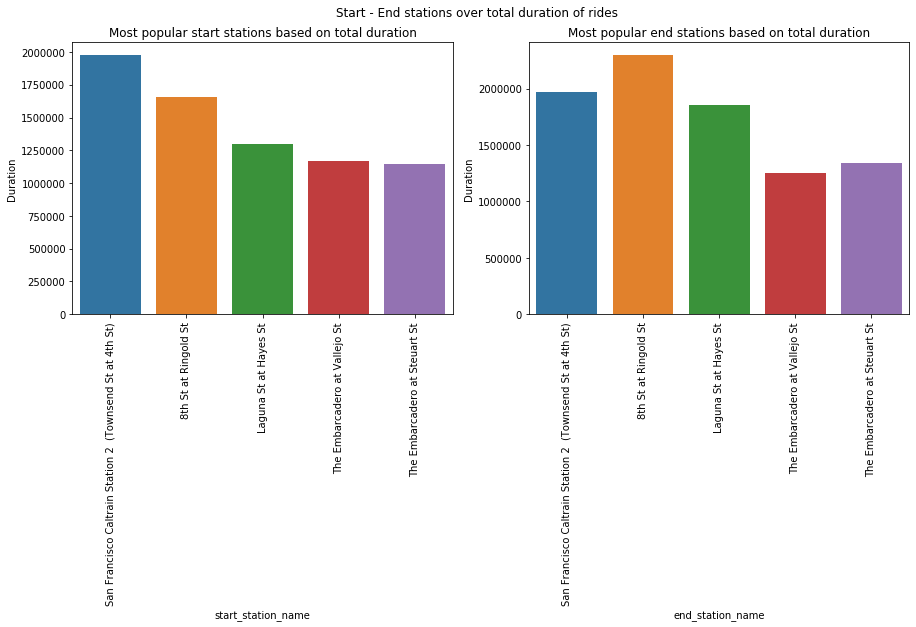

In [25]:

fig = plt.figure(figsize=[15,5])
fig.suptitle("Start - End stations over total duration of rides")
#plt.subplot_adjust(hspace = 0.5)

plt.subplot(1,2,1)
#df.start_station_id.nunique()
#total_dur = df_clean.groupby('start_station_name').size().sort_values(ascending = False).head()
#total_dur = total_dur.reset_index(name = 'duration_min')
g=sb.barplot(data = strt_id_name, x = 'start_station_name',y='duration_min');
g.set_title('Most popular start stations based on total duration')
g.set_ylabel('Duration')
g.set_xlabel('start_station_name');
plt.xticks(rotation=90);

plt.subplot(1,2,2)
#df.end_station_id.nunique()
#total_dur = df_clean.groupby('end_station_id').size().sort_values(ascending = False).head()
#total_dur = total_dur.reset_index(name = 'duration_min')
g=sb.barplot(data = end_id_name, x = 'end_station_id',y='duration_min');
g=sb.barplot(data = strt_id_name, x = 'start_station_name',y='duration_min');
g.set_title('Most popular end stations based on total duration')
g.set_ylabel('Duration')
g.set_xlabel('end_station_name');
plt.xticks(rotation=90);







> It is clear from the above graph that the station San Francisco California Station 2 is more popular station than Market Street at 10th st based on the Duartion of the rides by the users
>Similarly it also shows that the station 8th St at Ringold St is seen to be a more popular station based on the longer duartion of the rides ending here.

## Year wise distribution of bike renting among subscriber vs customer

> Here we are trying to analyse the behaviour of the user over the past 2 years on monthly basis, therefor here we exclude the 2017 data as it contains less information as well as 2020 data which only have information for few months only

In [26]:
df_yr = df_clean.query('start_year != 2017 and start_year != 2020')
#df_yr
df_2018 = df_yr.query('start_year == 2018')
df_2019 = df_yr.query('start_year == 2019');

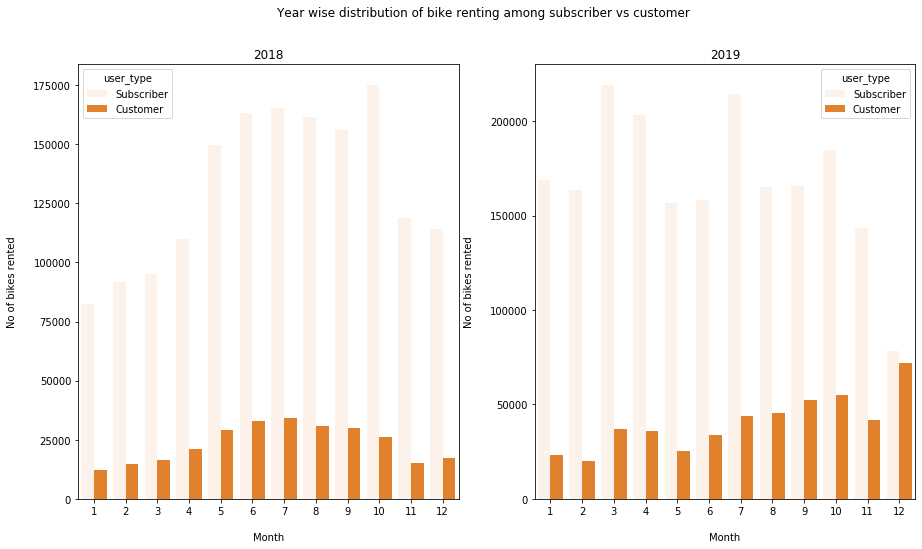

In [27]:

fig = plt.figure(figsize=[15,8])
fig.suptitle("Year wise distribution of bike renting among subscriber vs customer")
plt.subplot(1,2,1)
ax = sb.countplot(data = df_2018, 
             x = 'month',hue = 'user_type',
             color = sb.color_palette()[1]);
plt.title("2018")
plt.xlabel('Month', labelpad=16)
plt.ylabel('No of bikes rented', labelpad=16)

plt.subplot(1,2,2)
ax = sb.countplot(data = df_2019, 
             x = 'month',hue = 'user_type',
             color = sb.color_palette()[1]);
plt.title("2019")
plt.xlabel('Month', labelpad=16)
plt.ylabel('No of bikes rented', labelpad=16);

>The bike usage trend of the customers vs subribers appears to be same throught the year altough that treend is seen to changing as we can see that the usage of bike is seen rising in the last quarter of the 2019 and so is the number of one time customers 

## Day of the week and rides among user type

>The Year wise reflection of the behavior of user type as per Day of the week


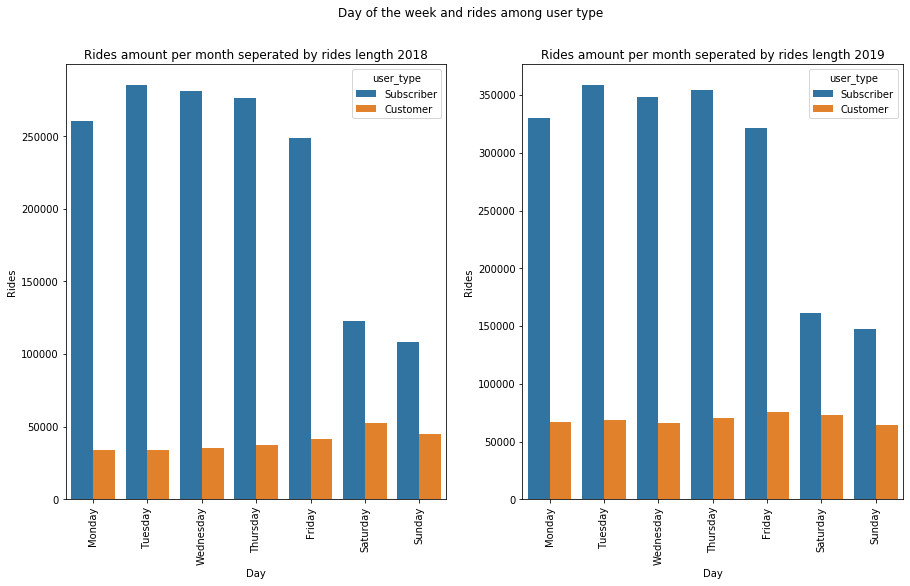

In [28]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Day of the week and rides among user type")
plt.subplot(1,2,1)
b=sb.countplot(data = df_2018, x = 'start_dow',hue='user_type',order=["Monday", "Tuesday","Wednesday","Thursday",
                                                                                  "Friday","Saturday","Sunday"]);
b.set_title('Rides amount per month seperated by rides length 2018')
b.set_ylabel('Rides')
b.set_xlabel('Day')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
b=sb.countplot(data = df_2019, x = 'start_dow',hue='user_type',order=["Monday", "Tuesday","Wednesday","Thursday",
                                                                                  "Friday","Saturday","Sunday"]);
b.set_title('Rides amount per month seperated by rides length 2019')
b.set_ylabel('Rides')
b.set_xlabel('Day')
plt.xticks(rotation=90);

>Here we can see that altough the rider count of the subscribers are very large than the one time users but here we can see that the count for one time customers has increased in the weekdays as the customers tend to grow.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!